In [1]:
%run ~/.python/init.ipynb

In [2]:
import torch

In [3]:
path = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic')

In [4]:
def load_paths(globstring):
    return (pd.DataFrame(path.glob(globstring), columns=['path'])
            .assign(
                number = lambda x: x.path.apply(lambda y: int(str(y).split('_')[1].split(".")[0]))
            )
            .sort_values('number')
            .drop('number', axis=1)
            .reset_index(drop=True))

In [5]:
videos = load_paths("video_*.pt")
coords = load_paths("coords_*.npy")

In [10]:
# train_percentage = 0.8
# n_videos = videos.shape[0]
train_idx = videos.shape[0] - 100

In [11]:
video_train, video_test = videos.iloc[:train_idx], videos.iloc[train_idx:]
coords_train, coords_test = coords.iloc[:train_idx], coords.iloc[train_idx:]


In [14]:
video_test.shape

(100, 1)

In [12]:
print(video_train.iloc[-1][0])
print(coords_train.iloc[-1][0])

/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/video_424.pt
/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic/coords_424.npy


In [15]:
outpath = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/train_test_splits/carla-no-traffic')

video_train.to_csv(outpath / 'video_train.csv')
video_test.to_csv(outpath / 'video_test.csv')

coords_train.to_csv(outpath / 'coords_train.csv')
coords_test.to_csv(outpath / 'coords_test.csv')

## make dataset for regression

In [10]:
# !rm -rf /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression/train
# !rm -rf /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression/test

In [16]:
!mkdir -p /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression-final/train
!mkdir -p /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression-final/test

In [18]:
from parallel import pmap

In [19]:
root = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression-final/')
train_path = root / 'train'
test_path = root / 'test'


def process_videos(name_row):
    name, row = name_row
    video = torch.load(row.path).numpy()
    video_name = row.path.parts[-1]    
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".pt", f"_{frame_idx}.npy")
        frame_path = train_path / frame_name
        np.save(frame_path, frame)

def process_coords(name_row):
    name, row = name_row
    video = np.load(row.path)
    video_name = row.path.parts[-1]
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".npy", f"_{frame_idx}.npy")
        frame_path = train_path / frame_name
        np.save(frame_path, frame)



res = pmap(process_videos, video_train.iterrows())


In [20]:
res = pmap(process_coords, coords_train.iterrows())

In [21]:
def process_videos_test(name_row):
    name, row = name_row
    video = torch.load(row.path).numpy()
    video_name = row.path.parts[-1]    
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".pt", f"_{frame_idx}.npy")
        frame_path = test_path / frame_name
        np.save(frame_path, frame)

def process_coords_test(name_row):
    name, row = name_row
    video = np.load(row.path)
    video_name = row.path.parts[-1]
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".npy", f"_{frame_idx}.npy")
        frame_path = test_path / frame_name
        np.save(frame_path, frame)
        
        
res = pmap(process_videos_test, video_test.iterrows())
res = pmap(process_coords_test, coords_test.iterrows())

## Plot train/test paths 

In [16]:
def plot(arrs):
    fig, ax = plt.subplots(1, 1, dpi=200, figsize=(8, 6))

    for k, arr in arrs.items():
        ax = sns.lineplot(x=arr[:,0],
                          y=arr[:,1],
                          sort=False,
                          lw=1,
                          ax=ax,
                          label=k,
                          legend=False,
                         )

    # ax.set_xlim(*xlim)
    # ax.set_ylim(*ylim)

#     handles, labels = ax.get_legend_handles_labels()
#     fig.legend(handles,
#                labels,
#                ncol=5,
#                loc='lower center',
#                bbox_to_anchor=(0.5, -0.25),
#                bbox_transform=plt.gcf().transFigure
#               )

In [17]:
train_arrs = {p.path.parts[-1]:np.load(p.path) for n, p in coords_train.iterrows()}
test_arrs = {p.path.parts[-1]:np.load(p.path) for n, p in coords_test.iterrows()}

In [ ]:
coords_train.to_csv(outpath / 'coords_train.csv')
coords_test.to_csv(outpath / 'coords_test.csv')

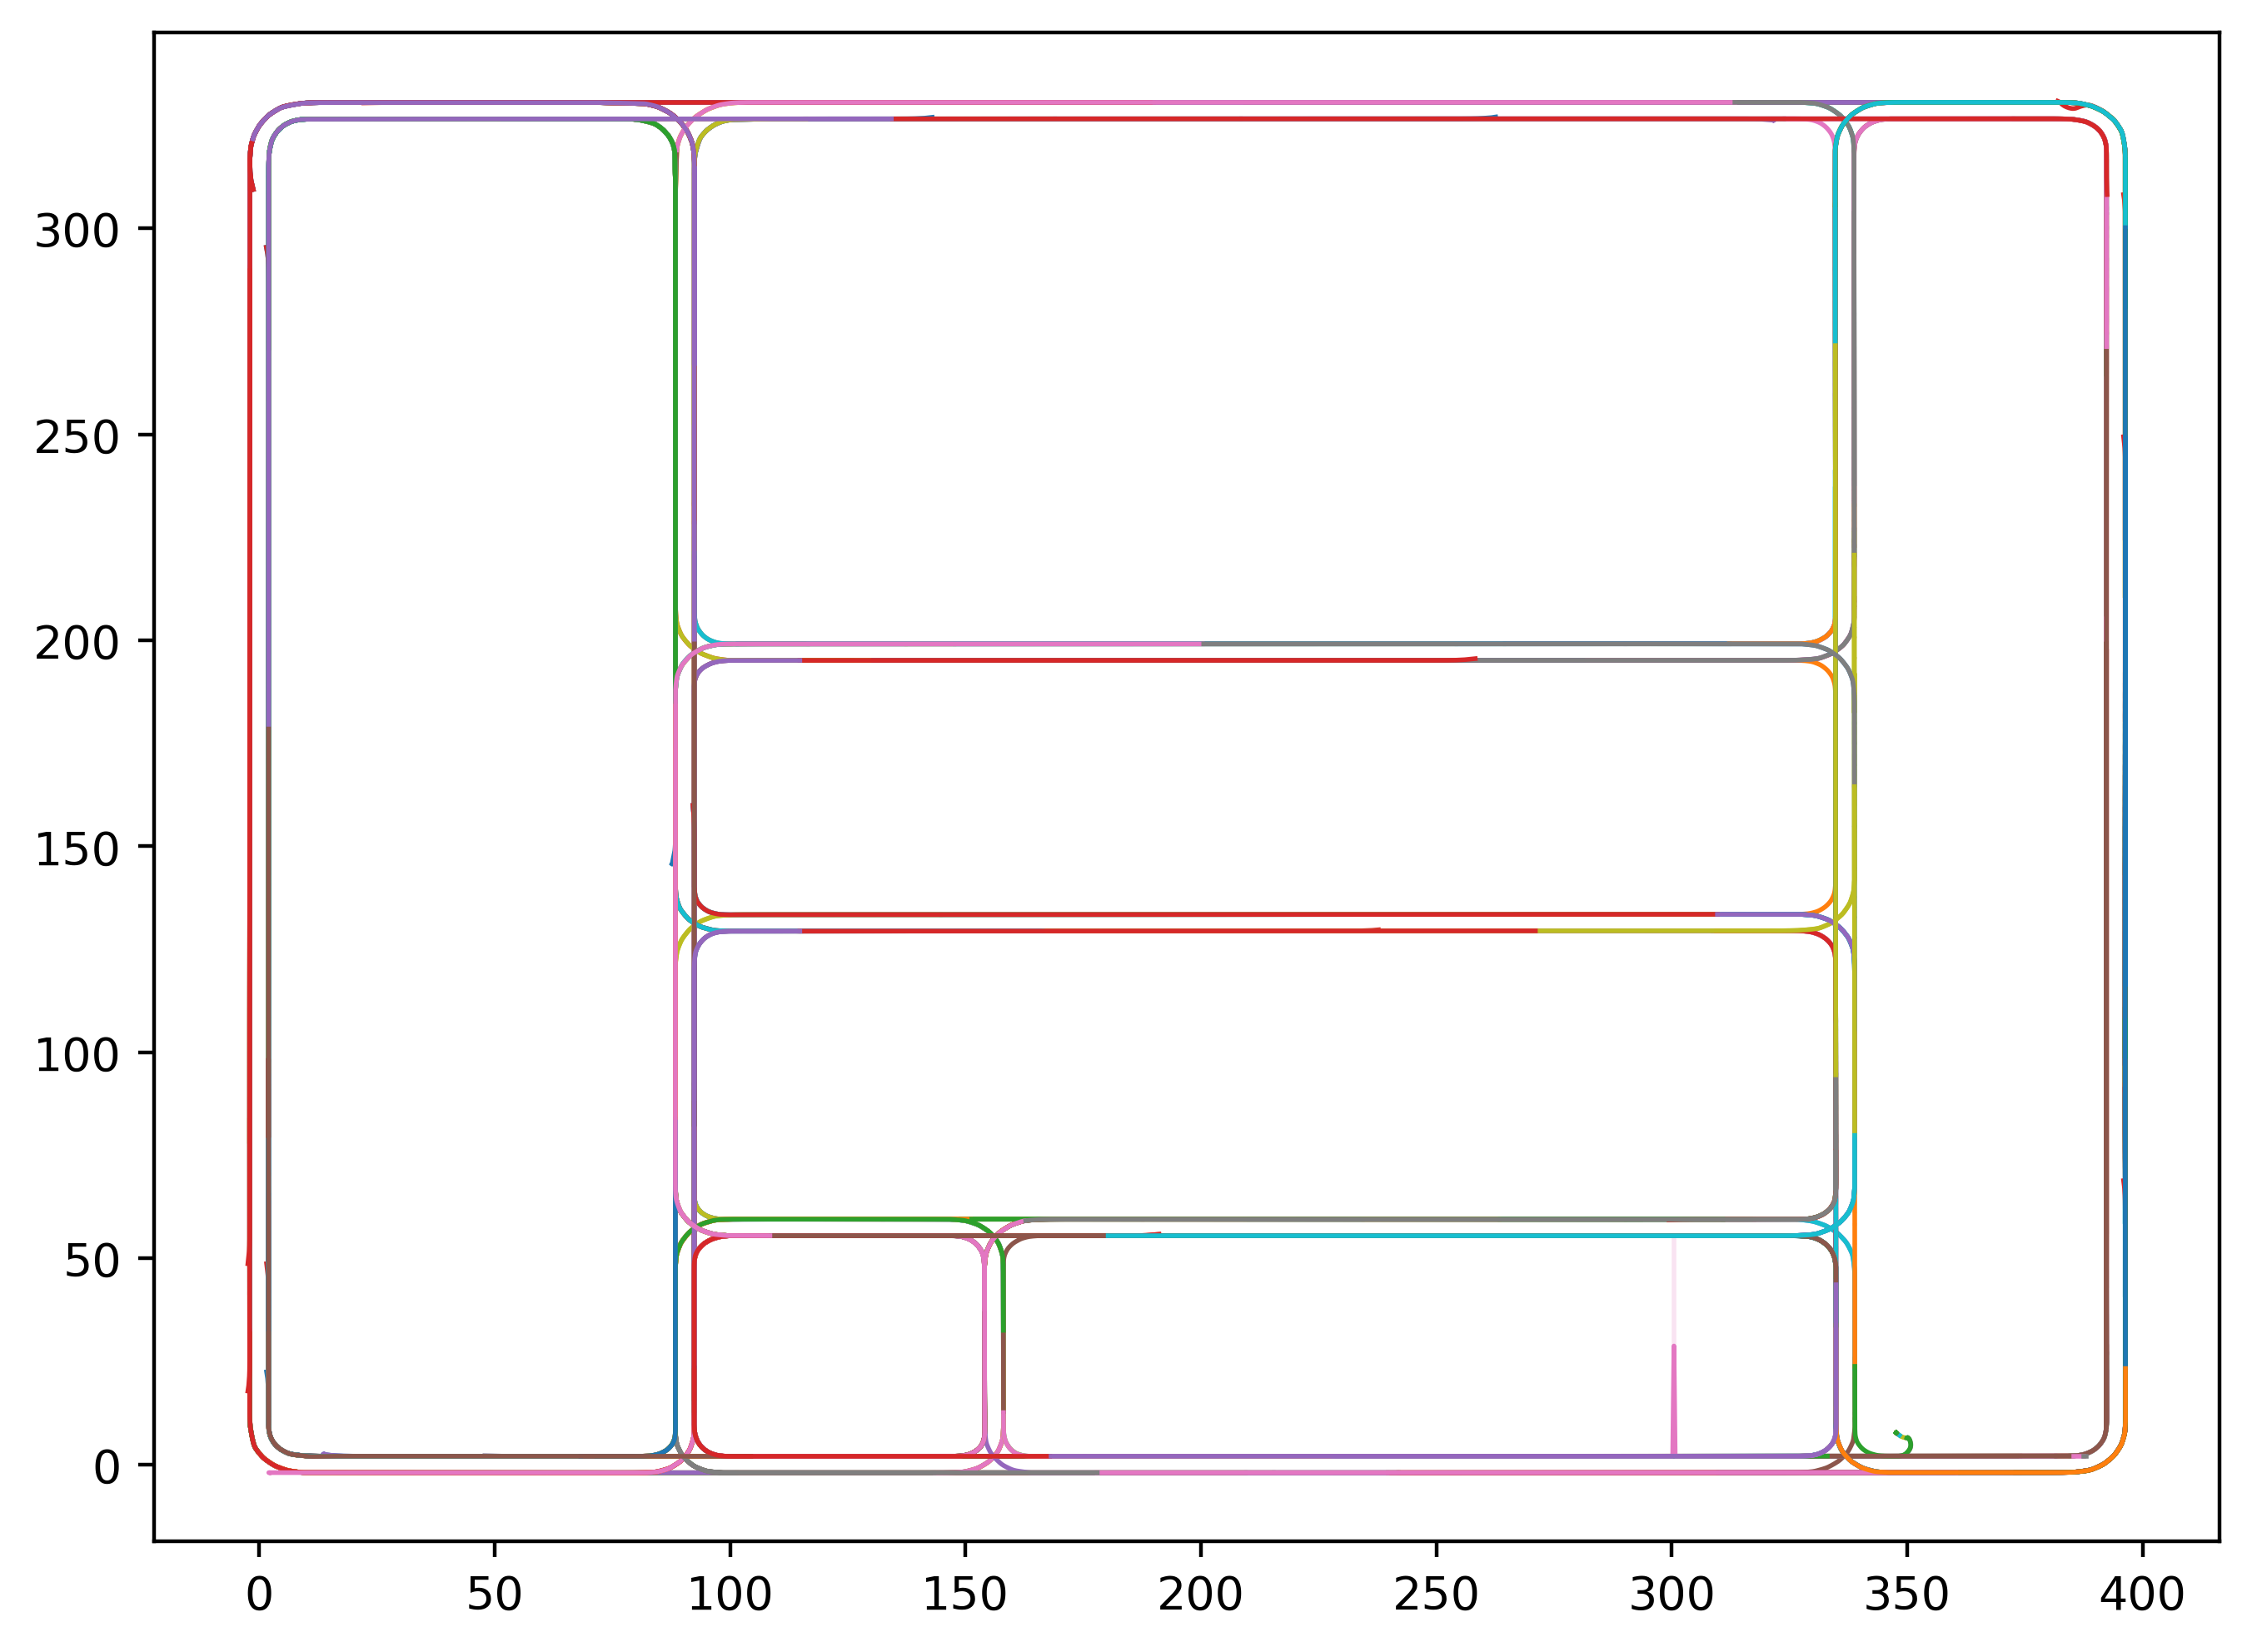

In [18]:
plot(train_arrs)

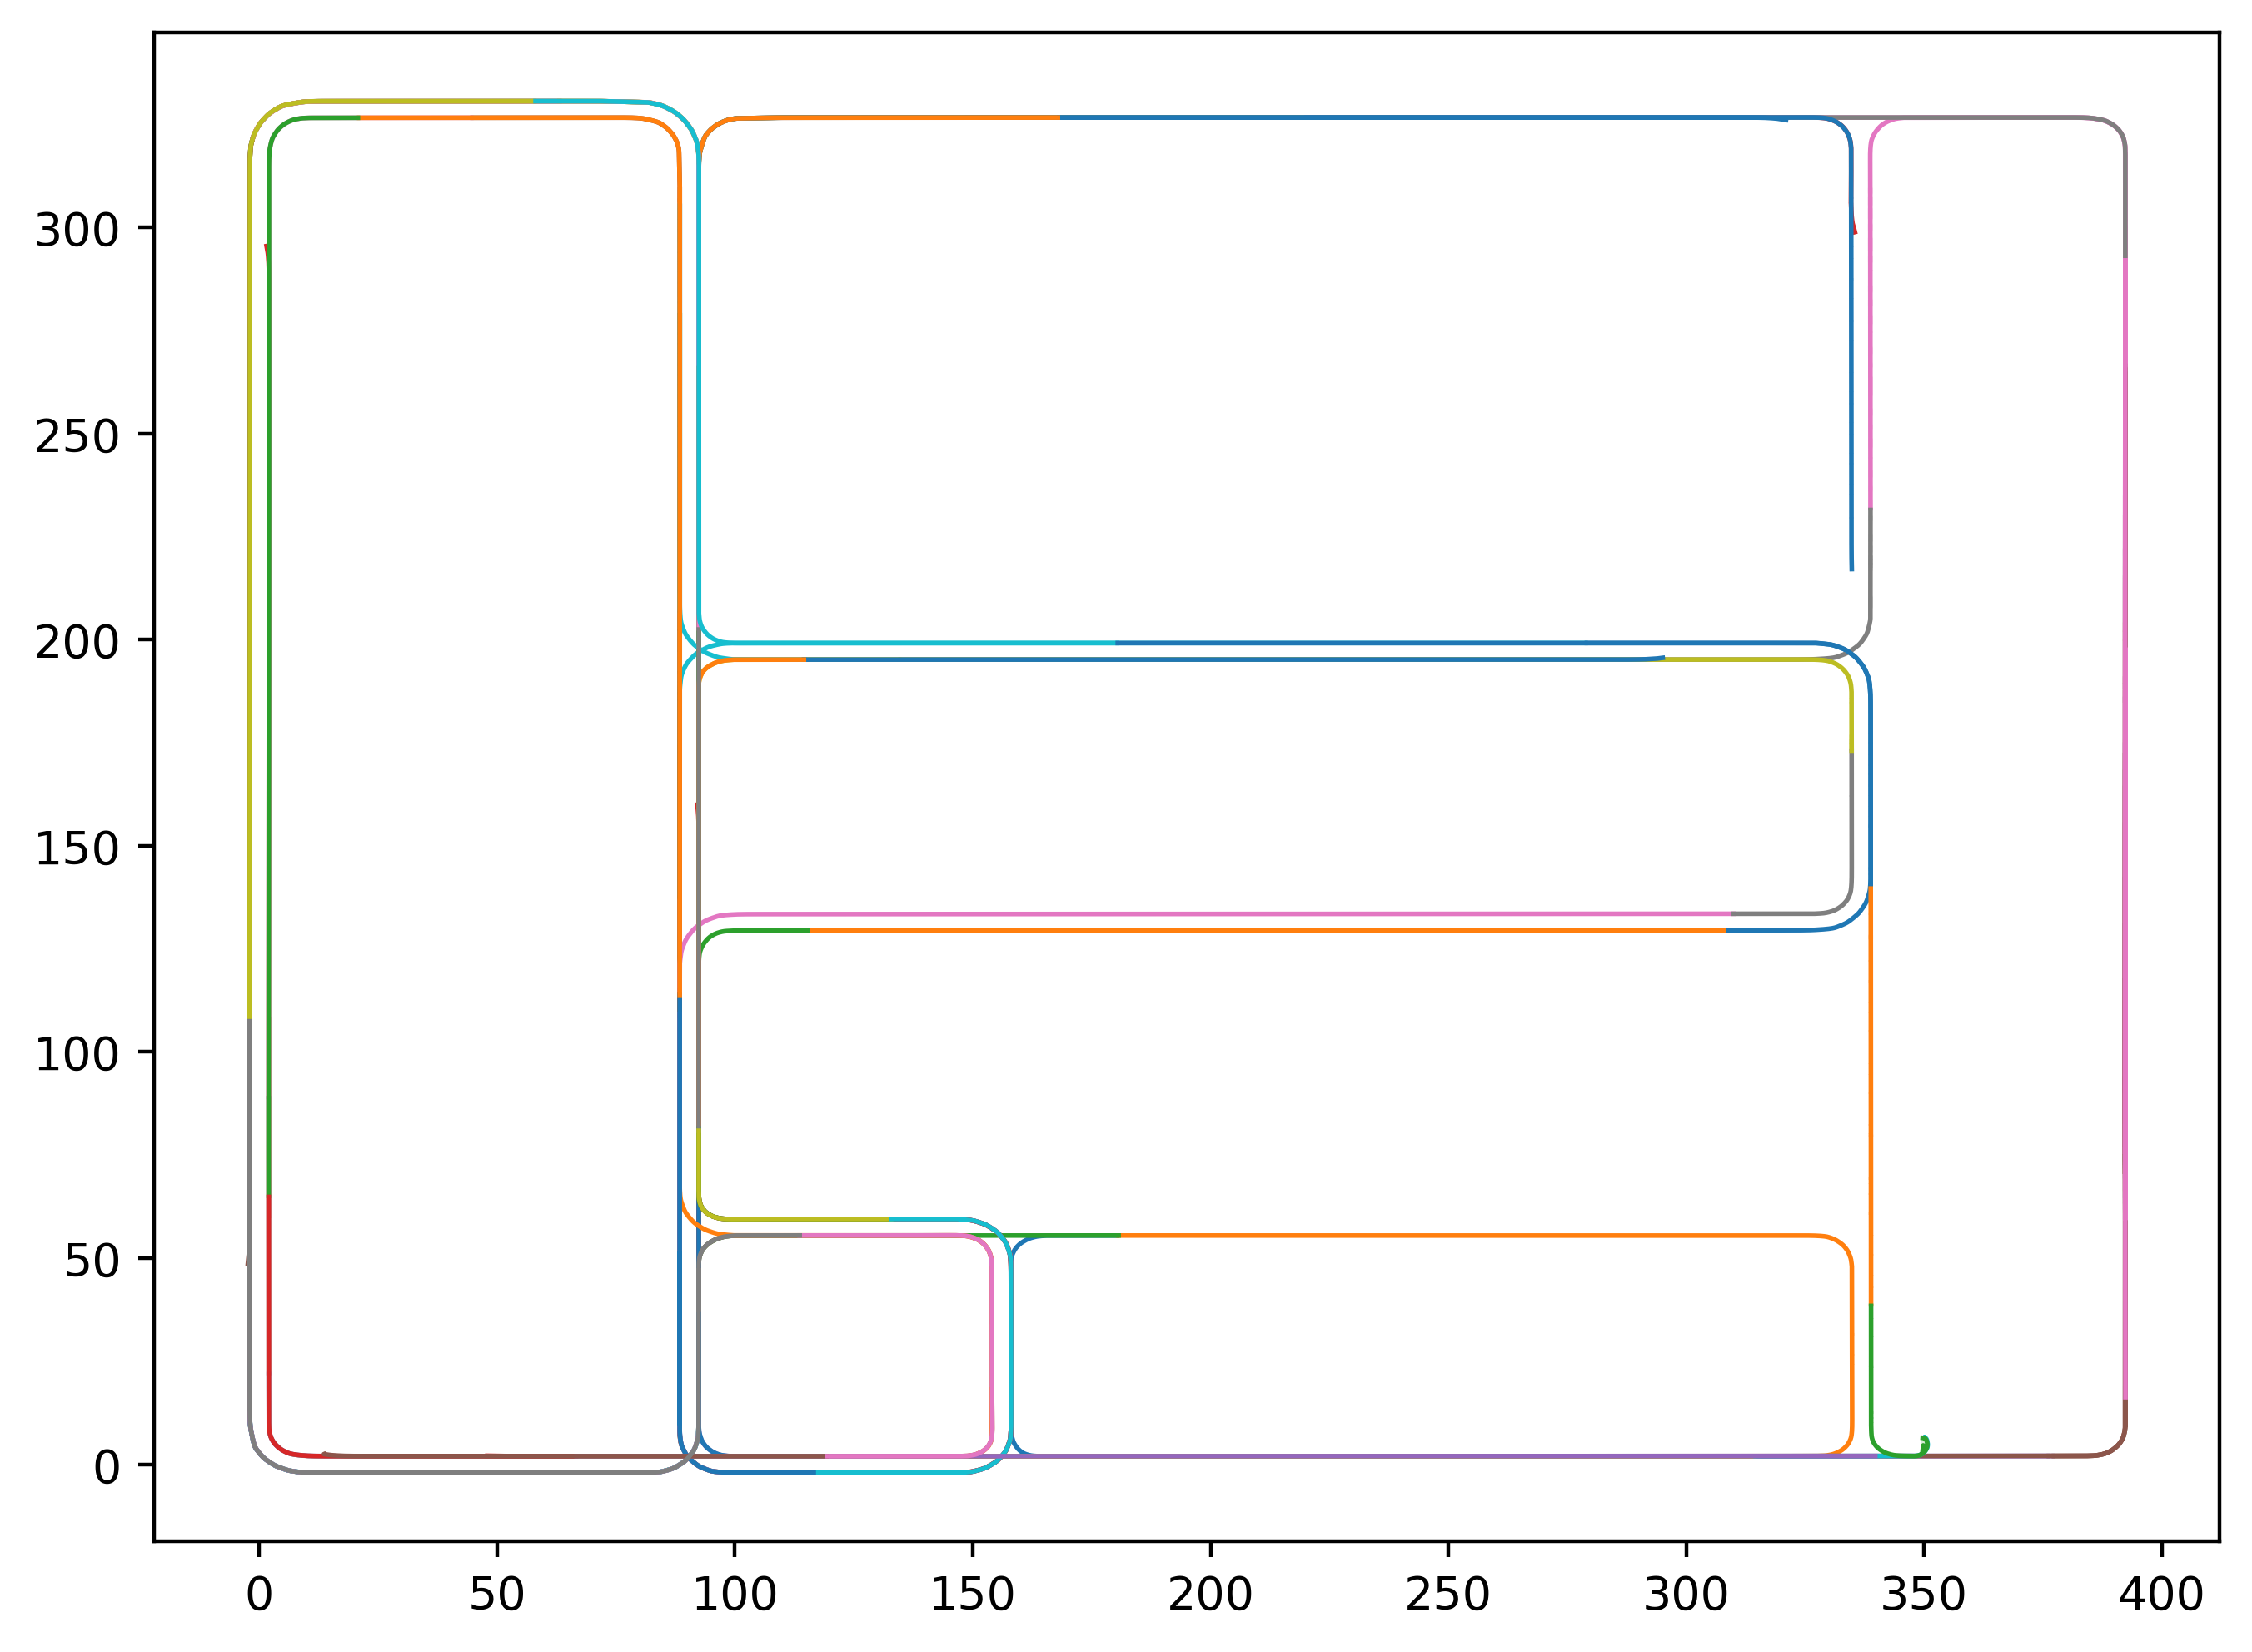

In [19]:
plot(test_arrs)

# make small dataset for debugging

In [10]:
!mkdir -p /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression_small/train
!mkdir -p /ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression_small/test

In [13]:
root = Path('/ubc/cs/research/plai-scratch/video-diffusion-shared/datasets/carla-no-traffic-regression_small/')
train_path = root / 'train'
test_path = root / 'test'


def process_videos(name_row):
    name, row = name_row
    video = torch.load(row.path).numpy()
    video_name = row.path.parts[-1]    
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".pt", f"_{frame_idx}.npy")
        frame_path = train_path / frame_name
        np.save(frame_path, frame)

def process_coords(name_row):
    name, row = name_row
    video = np.load(row.path)
    video_name = row.path.parts[-1]
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".npy", f"_{frame_idx}.npy")
        frame_path = train_path / frame_name
        np.save(frame_path, frame)



# res = pmap(process_videos, video_train.iterrows())


In [14]:
for name_row in video_train.iterrows():
    process_videos(name_row)
    break

video_0.pt


In [15]:
for name_row in coords_train.iterrows():
    process_coords(name_row)
    break

coords_0.npy


In [16]:
def process_videos_test(name_row):
    name, row = name_row
    video = torch.load(row.path).numpy()
    video_name = row.path.parts[-1]    
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".pt", f"_{frame_idx}.npy")
        frame_path = test_path / frame_name
        np.save(frame_path, frame)

def process_coords_test(name_row):
    name, row = name_row
    video = np.load(row.path)
    video_name = row.path.parts[-1]
    print(video_name)
    for frame_idx in range(video.shape[0]):
        frame = video[frame_idx]
        frame_name = video_name.replace(".npy", f"_{frame_idx}.npy")
        frame_path = test_path / frame_name
        np.save(frame_path, frame)
        
        
for name_row in video_test.iterrows():
    process_videos_test(name_row)
    break
    
for name_row in coords_test.iterrows():
    process_coords_test(name_row)
    break

video_387.pt
coords_387.npy
